In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

data = pd.read_csv('team2.csv', index_col=0)
data

,출생아수,졸업자수,사교육비,인구,직장가입자,지역가입자,사회단체참여율,수출,수입,실질국내총생산(GDP),...,노년부양비,노령화지수,사망자수,실업률,1인가구 비율,혼인건수(건),주택매매가격동향,\t맞벌이가구비율,유치원수,어린이집수
2000,640089,558932.0,200400.0,47008111.0,75391264.0,27525025.0,44.8,172267511.0,160481015.0,947394.8,...,10.1,34.3,248740.0,4.4,15.5,326104.0,1.9,42.3,19276,8494
2001,559934,558932.0,200400.0,47370164.0,75391264.0,27525025.0,44.8,150439144.0,141097821.0,947394.8,...,10.5,36.2,243813.0,4.0,15.5,326104.0,1.9,42.1,20097,8407
2002,496911,558932.0,200400.0,47644736.0,75391264.0,27525025.0,44.8,162470528.0,152126153.0,1020582.4,...,11.0,38.6,247524.0,3.3,15.5,326104.0,1.9,42.0,22147,8343
2003,495036,558932.0,200400.0,47892330.0,75391264.0,27525025.0,44.8,193817443.0,178826657.0,1052703.1,...,11.5,41.1,246463.0,3.6,15.5,326104.0,1.9,42.0,24142,8292
2004,476958,558932.0,200400.0,48082519.0,75391264.0,27525025.0,38.8,253844672.0,224462687.0,1107416.2,...,12.0,43.8,246220.0,3.7,15.5,326104.0,1.9,42.2,26903,8246
2005,438707,558932.0,200400.0,48184561.0,75391264.0,27525025.0,38.8,284418743.0,261238264.0,1155129.7,...,12.5,46.8,245874.0,3.7,20.0,326104.0,1.9,42.6,28367,8275
2006,451759,558932.0,200400.0,48438292.0,75391264.0,27525025.0,38.8,325464848.0,309382632.0,1215939.5,...,13.0,50.4,244162.0,3.5,20.0,326104.0,1.9,42.6,29233,8290
2007,496822,558932.0,200400.0,48683638.0,75391264.0,27525025.0,39.8,371489086.0,356845733.0,1286458.5,...,13.5,54.6,246482.0,3.2,20.0,326104.0,1.9,43.0,30856,8294
2008,465892,558932.0,209095.0,49054708.0,75391264.0,27525025.0,39.8,422007328.0,435274737.0,1325219.3,...,14.0,58.8,246113.0,3.2,20.0,326104.0,1.9,43.2,33499,8344
2009,444849,558932.0,216259.0,49307835.0,75391264.0,27525025.0,39.8,363533561.0,323084521.0,1335724.3,...,14.4,62.9,246942.0,3.6,20.0,326104.0,1.9,43.0,35550,8373


In [55]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.head(),y.head()

(          졸업자수      사교육비          인구       직장가입자       지역가입자  사회단체참여율  \
 2000  558932.0  200400.0  47008111.0  75391264.0  27525025.0     44.8   
 2001  558932.0  200400.0  47370164.0  75391264.0  27525025.0     44.8   
 2002  558932.0  200400.0  47644736.0  75391264.0  27525025.0     44.8   
 2003  558932.0  200400.0  47892330.0  75391264.0  27525025.0     44.8   
 2004  558932.0  200400.0  48082519.0  75391264.0  27525025.0     38.8   
 
                수출           수입  실질국내총생산(GDP)  1인당주거면적  ...  노년부양비  노령화지수  \
 2000  172267511.0  160481015.0      947394.8     26.2  ...   10.1   34.3   
 2001  150439144.0  141097821.0      947394.8     26.2  ...   10.5   36.2   
 2002  162470528.0  152126153.0     1020582.4     26.2  ...   11.0   38.6   
 2003  193817443.0  178826657.0     1052703.1     26.2  ...   11.5   41.1   
 2004  253844672.0  224462687.0     1107416.2     26.2  ...   12.0   43.8   
 
           사망자수  실업률  1인가구 비율   혼인건수(건)  주택매매가격동향  \t맞벌이가구비율   유치원수  어린이집수  
 2000  248740

# MinMax

In [56]:
# MinMax_Scale 
from sklearn.preprocessing import minmax_scale
minmax_X = minmax_scale(X)
minmax_Y = minmax_scale(y)

X_train, X_test, y_train, y_test = train_test_split(minmax_X,minmax_Y, random_state=0)
print(minmax_X.shape,minmax_Y.shape,'\n')
print(minmax_X[:3,:],'\n')
print(minmax_Y)

(19, 31) (19,) 

[[0.14831918 0.58170021 0.         0.         0.         0.53097345
  0.04803561 0.04918287 0.         0.         0.         0.08811242
  0.         0.09090909 1.         0.         0.22155649 1.
  1.         1.         1.         0.         0.         0.08957042
  1.         0.         0.95825929 0.27536232 0.06976744 0.
  0.31673052]
 [0.14831918 0.58170021 0.07873247 0.         0.         0.53097345
  0.         0.         0.         0.         0.01195219 0.
  0.         0.09090909 1.         0.         0.4716679  1.
  1.         1.         0.96638655 0.04210526 0.02448454 0.
  0.69230769 0.         0.95825929 0.27536232 0.02325581 0.03351841
  0.20561941]
 [0.14831918 0.58170021 0.13844122 0.         0.         0.53097345
  0.02647632 0.02798326 0.08506812 0.         0.08366534 0.14381567
  0.         0.09090909 1.         0.         0.64170999 1.
  1.         1.         0.92436975 0.09473684 0.05541237 0.06746414
  0.15384615 0.         0.95825929 0.27536232 0.   

# PCA(16차원으로 축소)

[7.78888087e-01 9.54425090e-02 4.98503284e-02 2.04777732e-02
 1.49285483e-02 9.85727890e-03 8.98040319e-03 6.95825205e-03
 5.10089810e-03 2.68913637e-03 2.28994350e-03 1.87191942e-03
 1.17618265e-03 7.27488675e-04 3.90277226e-04 2.61085787e-04]


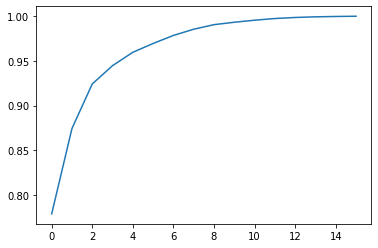

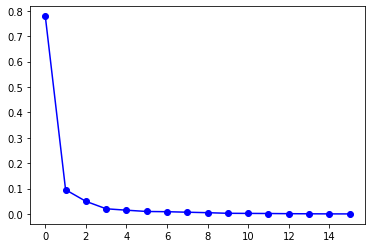

array([7.78888087e-01, 9.54425090e-02, 4.98503284e-02, 2.04777732e-02,
       1.49285483e-02, 9.85727890e-03, 8.98040319e-03, 6.95825205e-03,
       5.10089810e-03, 2.68913637e-03, 2.28994350e-03, 1.87191942e-03,
       1.17618265e-03, 7.27488675e-04, 3.90277226e-04, 2.61085787e-04])

In [58]:

import numpy as np
from sklearn.decomposition import PCA


# 16개의 변수중 영향력있는 변수 3개추출
pca = PCA(n_components=16)
model = pca.fit_transform(minmax_X)
print(pca.explained_variance_ratio_) # 설명력
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow를 시각적으로 확인
plt.show()
plt.plot(pca.explained_variance_ratio_, 'bo-')
plt.show()
pca.explained_variance_ratio_

In [59]:
# 변수 3개추출 후 DataFrame으로 생성
princ = pd.DataFrame(data=model[:,:3], columns=range(0,3))
princ

,0,1,2
0,-1.816233,-0.774875,-0.251775
1,-1.862099,-0.719782,-0.322239
2,-1.777247,-0.450820,-0.325178
3,-1.729611,-0.431478,-0.292029
4,-1.638990,-0.159283,0.049451
5,-1.414771,0.042235,0.236338
6,-1.282019,0.170931,0.301236
7,-1.025782,0.552744,0.339022
8,-0.903249,0.409913,0.443117
9,-0.769998,0.656658,0.398295


In [60]:
X_train, X_test, y_train, y_test = train_test_split(princ,minmax_Y, random_state=0)

# PCA후 여러 모델에 적용?

# Linear

In [61]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)  
result = model.fit()
print(result.summary())

X_pred=result.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred))
y_pred = result.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred))  # mse를 비교했을때 test>train : 과소적합 


df1 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred})
df1.corr()


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.176
Model:                            OLS   Adj. R-squared (uncentered):             -0.049
Method:                 Least Squares   F-statistic:                             0.7810
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                       0.529
Time:                        21:42:09   Log-Likelihood:                         -8.4512
No. Observations:                  14   AIC:                                      22.90
Df Residuals:                      11   BIC:                                      24.82
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\ICT01_18\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


,y_test,y_preds
y_test,1.000000,0.950606
y_preds,0.950606,1.000000


## Linear 이상하다. GridSearchCV도 안됨

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100], 
           'gamma':[0.001,0.01,0.1,1,10,100]}

clf = GridSearchCV(result, param_grid, cv = 5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

TypeError: estimator should be an estimator implementing 'fit' method, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000213E28E2108> was passed

In [63]:

X_pred2 = clf.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred2))
y_pred2 = clf.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred2))

df2 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred2})
df2.corr()


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# DecisionTreeRegressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 모델평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_pred=model.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred))
y_pred = model.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred))  # mse를 비교했을때 test>train : 과소적합 


df1 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred})
df1.corr()

depths = np.arange(1, 21)
depths
num_leafs = [1, 5, 10, 20, 50, 100]

X_train MSE :  0.0
X_test MSE :  0.01739783590561034


## GridSearchCV 안됨

In [65]:
from sklearn.model_selection import GridSearchCV
param_grid = {'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}

clf = GridSearchCV(model, param_grid, cv = 5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

ValueError: Invalid parameter decisiontreeregressor for estimator DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

In [66]:

X_pred2 = clf.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred2))
y_pred2 = clf.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred2))

df2 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred2})
df2.corr()


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# RandomForestRegressor

In [67]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_pred=model.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred))
y_pred = model.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred))  # mse를 비교했을때 test>train : 과소적합 


df1 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred})
df1.corr()

X_train MSE :  0.004709794899729132
X_test MSE :  0.007007691587369859


,y_test,y_preds
y_test,1.000000,0.965419
y_preds,0.965419,1.000000


## GridSearchCV 안됨

In [68]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100], 
           'gamma':[0.001,0.01,0.1,1,10,100]}

clf = GridSearchCV(model, param_grid, cv = 5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

ValueError: Invalid parameter C for estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [69]:
X_pred2 = clf.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred2))
y_pred2 = clf.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred2))

df2 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred2})
df2.corr()


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# XGboost

[21:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 0.122882


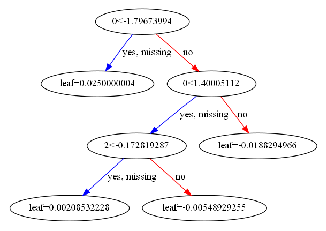

X_train MSE :  9.499178411046834e-06
X_test MSE :  0.015100039586621414


,y_test,y_preds
y_test,1.000000,0.938555
y_preds,0.938555,1.000000


In [70]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test) 

#모델평가
rmse = np.sqrt(mean_squared_error(y_test,preds)) 
print("RMSE : %f" % (rmse))

xgb.plot_tree(xg_reg,num_trees=0)
# rc : resource control 한다

plt.rcParams['figure.figsize'] = [30,10]
plt.show()

X_pred=xg_reg.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred))
y_pred = xg_reg.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred))  # mse를 비교했을때 test>train : 과소적합 


df1 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred})
df1.corr()

### MSE가 이상하다.
### GridSearchCV를 해도 의미 없다.

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100], 
           'gamma':[0.001,0.01,0.1,1,10,100]}

clf = GridSearchCV(xg_reg, param_grid, cv = 5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
X_pred2 = clf.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred2))
y_pred2 = clf.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred2))

df2 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred2})
df2.corr()


X_train MSE :  0.022342259190995122
X_test MSE :  0.03712640536152653


,y_test,y_preds
y_test,1.000000,0.818474
y_preds,0.818474,1.000000


# SVR

In [73]:
svr_model = SVR(gamma='scale')
svr_model.fit(X_train,y_train )

y_pred = svr_model.predict(X_test)


# 모델평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred),'\n')

df1=pd.DataFrame({'y_data':y_test,'preds':y_pred})
df1.corr()


# print(model)
X_pred=svr_model.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred))
y_pred = svr_model.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred))  # mse를 비교했을때 test>train : 과소적합 


df1 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred})
df1.corr()

MSE 0.009546754259575758
RMSE 0.09770749336450996
0.8333912660374732 

X_train MSE :  0.011588283336385164
X_test MSE :  0.009546754259575758


,y_test,y_preds
y_test,1.000000,0.964114
y_preds,0.964114,1.000000


In [74]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10,100], 
           'gamma':[0.001,0.01,0.1,1,10,100]}

clf = GridSearchCV(svr_model, param_grid, cv = 5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
{'C': 0.1, 'gamma': 1}


C:\Users\ICT01_18\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [75]:
X_pred2 = clf.predict(X_train)
print('X_train MSE : ', mean_squared_error(y_train, X_pred2))
y_pred2 = clf.predict(X_test)
print("X_test MSE : ",mean_squared_error(y_test, y_pred2))

df2 = pd.DataFrame({'y_test':y_test, 'y_preds':y_pred2})
df2.corr()

X_train MSE :  0.02351618151575935
X_test MSE :  0.034844260813723646


,y_test,y_preds
y_test,1.000000,0.988474
y_preds,0.988474,1.000000


## SVR이 좋다.